# House Prices Dataset

We would be approaching this analysis using the following steps:

- Question or problem definition.
- Acquire training and testing data.
- Wrangle, prepare, cleanse the data.
- Analyze, identify patterns, and explore the data.
- Model, predict and solve the problem.
- Visualize, report, and present the problem solving steps and final solution.
- Supply or submit the results.


## Question or problem definition

In this dataset we have the house prices of houses in Ames, Iowa. Since it is a very descriptive dataset, there are a lot of things we can do with this dataset. However, to keep it short and sweet, let us define the scope of this analysis to be to complete a comprehensive exploratory data analysis (EDA) of the house prices and to build a regressor model of the prices of the houses based on the columns in the training set to predict house prices in the test set/validation set.

Before you get started with this notebook, it is highly recommmended to go through this paper from the author of the dataset to get an overview of the dataset and how the usage is intended.
https://ww2.amstat.org/publications/jse/v19n3/decock.pdf

This notebook uses regularization techniques used by Alexandru Papiu in his regularized linear models notebook https://www.kaggle.com/apapiu/regularized-linear-models

## Acquire training and testing data

Let's import the data into the notebook from the training and test csv file and get all the packages we need for this analysis imported into the notebook too. Here we will be showing the structure and nature of values available on the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm
from scipy.stats import skew
from sklearn.model_selection import train_test_split

%matplotlib inline

Here we are importing the data from the csv file

In [2]:
df_train = pd.read_csv('house-prices/train.csv')
df_test = pd.read_csv('house-prices/test.csv')

In [3]:
df_train.shape

(1460, 81)

In [4]:
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
print(df_train.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Wrangle, prepare, cleanse the data.

In this section we are going to go through multiple techniques used to wrangle, prepare, cleanse the data.

Here is a breakdown of the techniques we are going to use:
- Finding out if there are any duplicate entries in the dataset
- Finding out about the type of columns: numeric and categorical
- Finding out the missing data in each column
- Filling in missing values with relevant data
- Finding and removing outliers from the data

### Finding out the number of duplicate entries in the dataset

If there are any duplicate entries in the dataset, because this would affect our analysis as our learning algorithm would learn from incorrect data

In [6]:
uniqueRows = len(set(df_train.Id))
totalRows = len(df_train.Id)
duplicateRows = totalRows - uniqueRows

# Tip: Assert allows you to test simple stuff in your data analysis as you go/sanity checks
assert (duplicateRows==0)

# Dropping the column Id because the column is not significant beyond this
#df_train = df_train.drop(['Id'],axis=1)

### Finding out about the type of columns: numeric and categorical

Let us split the columns by type

In [7]:
numeric = [col for col in df_test.columns if df_test.dtypes[col] != 'object']
categorical = [col for col in df_test.columns if df_test.dtypes[col] == 'object']
print("\nNumeric columns\n")
print(numeric)
print("\nCategorical columns\n")
print(categorical)


Numeric columns

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

Categorical columns

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageT

### Finding out the missing data in each column

Analysis on the columns for which the data is not available or filled with some None values

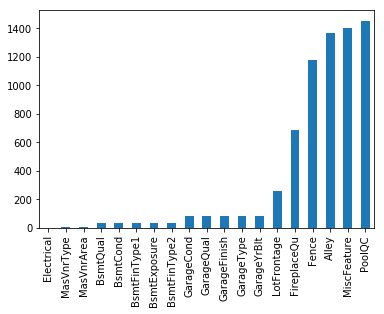

In [8]:
# Finding out the columns that are missing values in the dataset
missing = df_train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

We can clearly see the columns PoolQC, MiscFeature, Alley, Fence have a lot of values that are missing. But taking a closer look at the data, we understand the some part of each of these columns have information regarding the Alley or PoolQC and Fence. So right below, we are finding out the type of values each of these columns have and filling the null values with None so they are not null or NaN.

### Filling in missing values with relevant data

We will be doing this later when preparing the data for the model

### Finding and removing outliers in the data

Here we are trying to identify the outliers in the data which we cannot use in the model because it skews the analysis towards values that are unlikely. Here we are removing houses from the dataset that are larger than 4000 sqft and more than 700,000 in value.

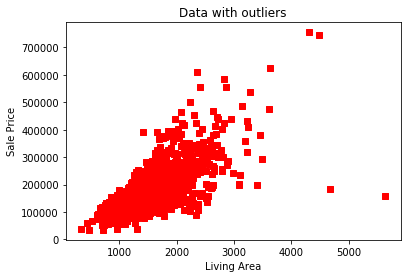

((1459, 80), (1456, 81))

In [9]:
# Looking for outliers
plt.scatter(df_train.GrLivArea, df_train.SalePrice, color='red', marker='s')
plt.title('Data with outliers')
plt.xlabel('Living Area')
plt.ylabel('Sale Price')
plt.show()
# Cleaning the dataset so there are no outliers in the dataset
df_train = df_train[(df_train.GrLivArea<4000) & (df_train.SalePrice<700000)]
#df_test = df_test[:df_train.shape[0]]
df_test.shape, df_train.shape

Text(0,0.5,'Sale Price')

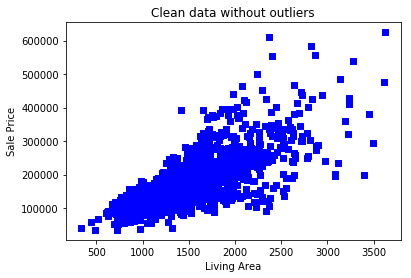

In [10]:
plt.scatter(df_train.GrLivArea, df_train.SalePrice, color='blue', marker='s')
plt.title('Clean data without outliers')
plt.xlabel('Living Area')
plt.ylabel('Sale Price')

### Finding out the distribution of data within the dataset

Now to find out how each of the variables are distributed amongst the dataset, we can pivot the table into its constituent features and find out how each variable is distributed amongst the dataset using pd.melt
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html

    (eg) A B  -> A variable value
         1 2     1 B        2
         1 3     1 B        3
         2 1     2 B        1
         2 2     2 B        2

For this we can only use numeric features and not any categorical features because of the nature of sns.FacetGrid. 

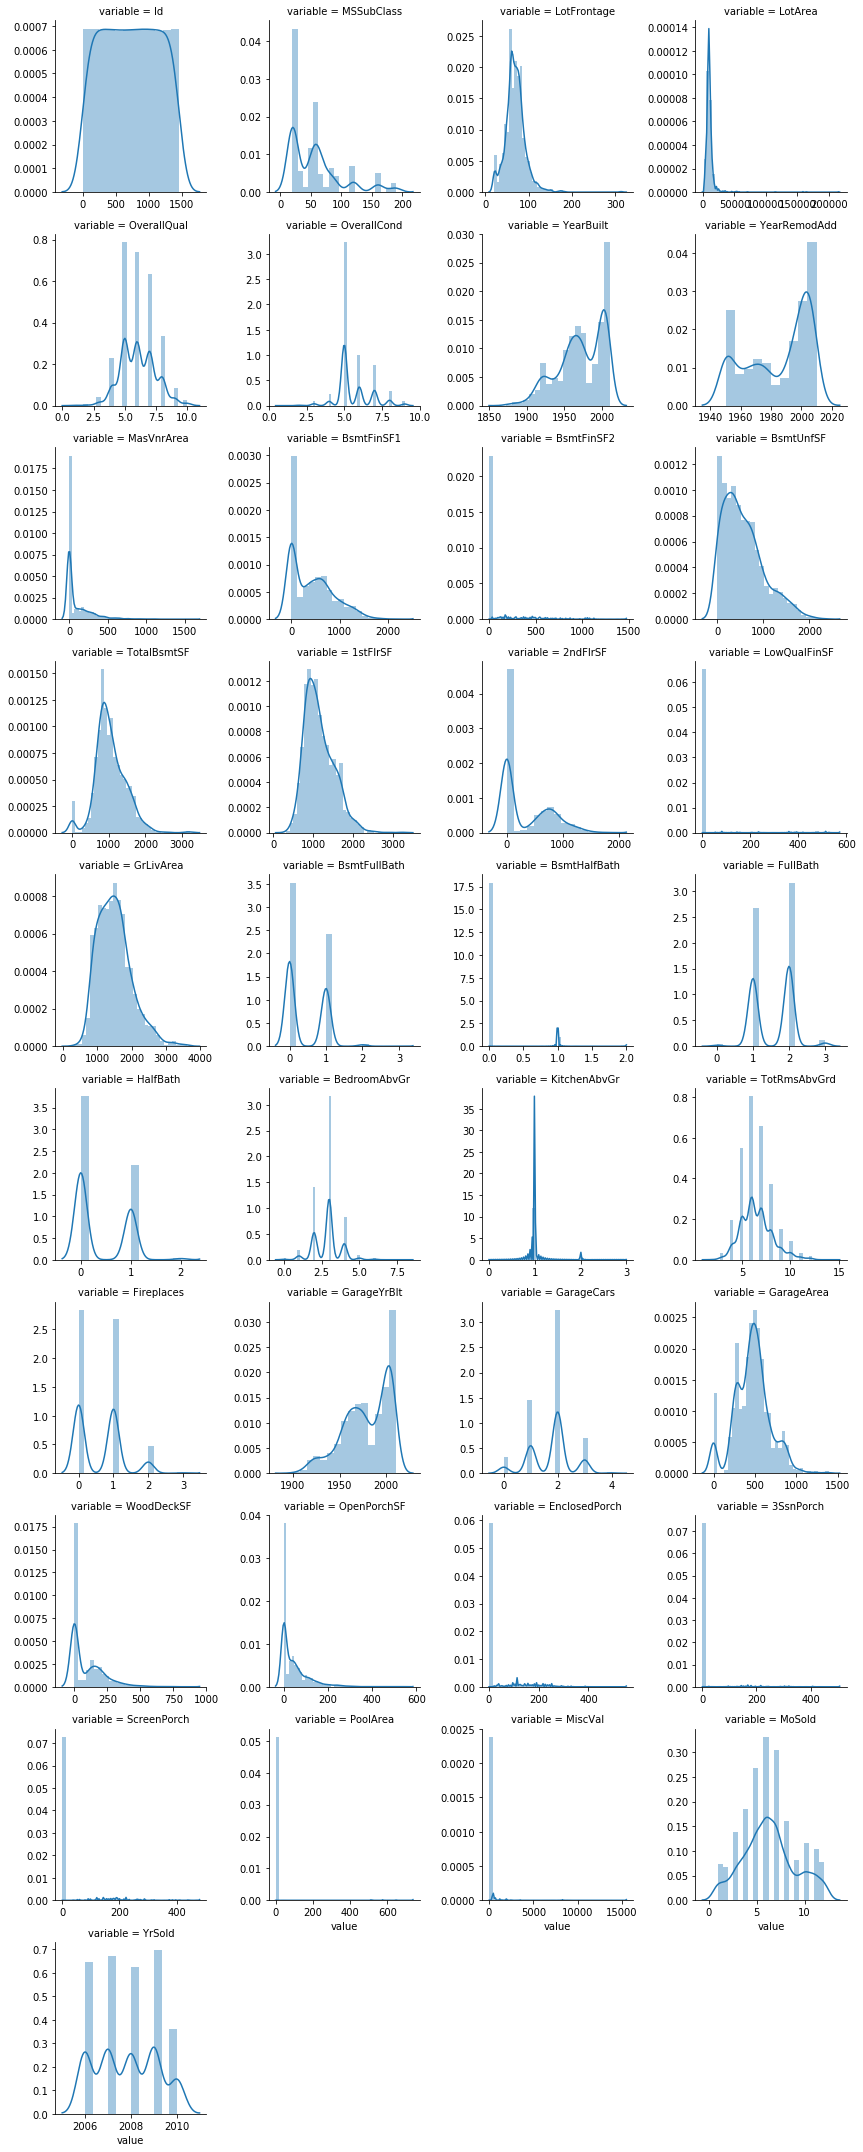

In [11]:
f = pd.melt(df_train, value_vars=numeric)
grid = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
grid = grid.map(sns.distplot, "value")

## Analyze, identify patterns, and explore the data.

### SalePrice

In this part of the analysis, we intend to explore this dataset to find out about SalePrice which would indicate the price at which the house was sold and find out how the different features of the dataset are correlated with the Sale Price of the house

In [12]:
df_train['SalePrice'].describe()

count      1456.000000
mean     180151.233516
std       76696.592530
min       34900.000000
25%      129900.000000
50%      163000.000000
75%      214000.000000
max      625000.000000
Name: SalePrice, dtype: float64

This is a attempt at a histogram for the year that the house was sold and the price of the house when it was sold

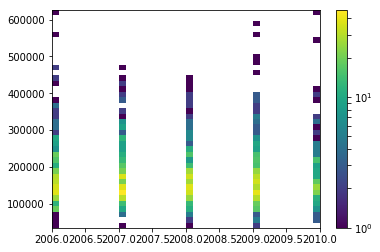

In [13]:
#Across the recession in 2008
#plt.scatter(df_train.YrSold, df_train.SalePrice, color='red', marker='s')
fig, ax = plt.subplots()
x= df_train.YrSold
y= df_train.SalePrice
counts, xedges, yedges, im = ax.hist2d(x, y, bins=40, norm=LogNorm())
plt.colorbar(im, ax=ax)
plt.show()

Another attempt at a cool seaborn plot to show the relationship between Living Square Foot, Overall Condition of the House and Sale Price

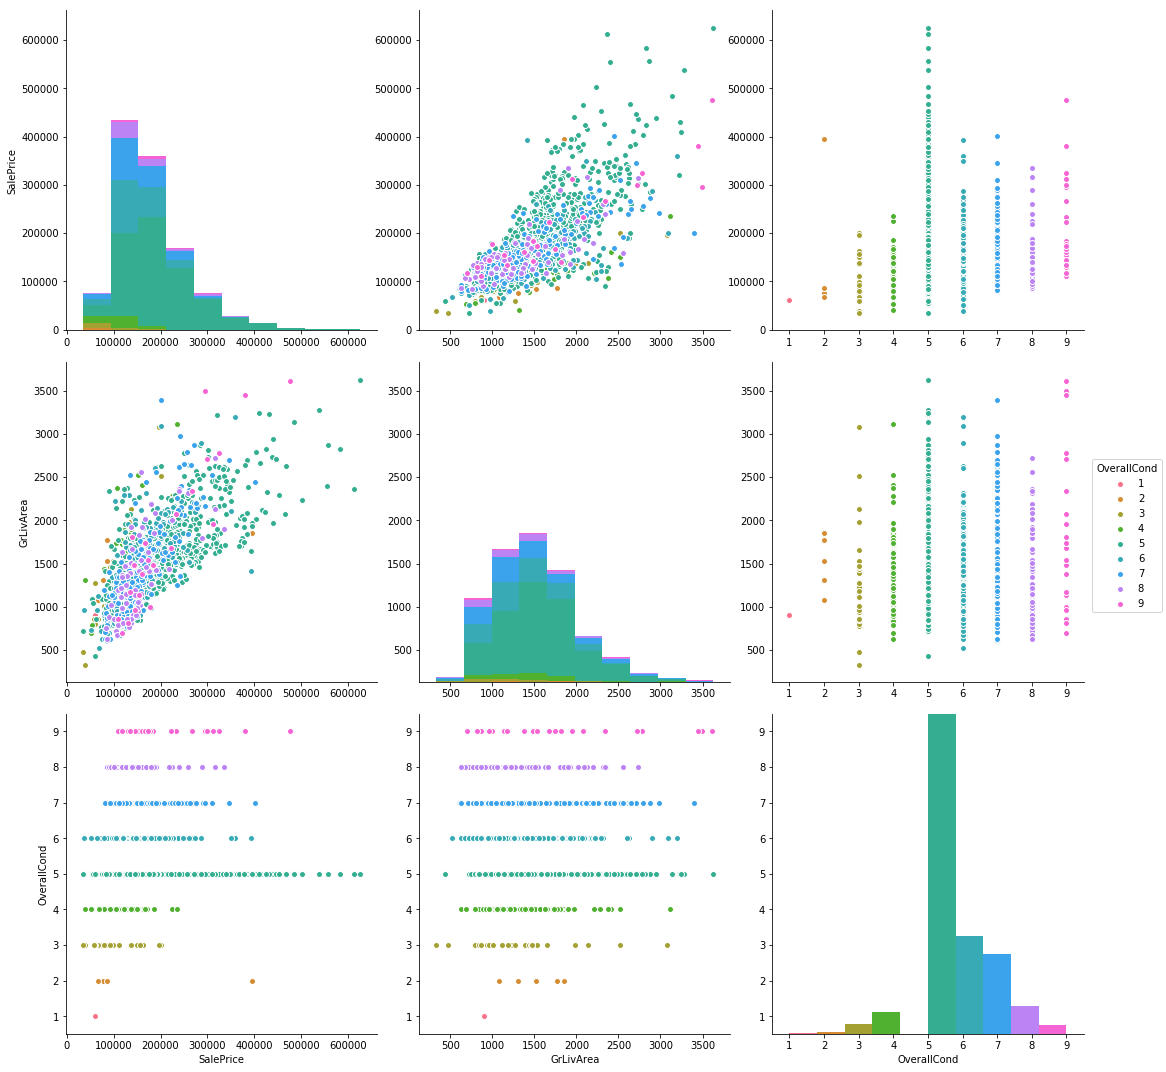

In [14]:
def cool_plot(df):
    #snsplot = sns.stripplot(y=df.SalePrice, x=df.GrLivArea,
    #                        data=df,
    #                        jitter=True,
    #                        marker='o',
    #                        alpha=0.7,
    #                        hue="YrSold")
    snsplot = sns.pairplot(df_train[['SalePrice', 'GrLivArea','OverallCond']], hue='OverallCond', palette='husl', size=5);

    #snsplot.axes.set_title(
    #    'Distributions of SalesPrices  Living Area', fontsize=16)
    #snsplot.set_xlabel('Living Area', fontsize=14)
    #snsplot.set_ylabel('Sale Price', fontsize=14)
    #snsplot.tick_params(labelsize=16)
    #fig = snsplot.get_figure()
    
    fig.set_size_inches(8, 10)
    
    plt.show()

cool_plot(df_train)

### Correlations between columns

Looking for correlations between different variables in the dataset, we find out the features that correlate the most to the SalePrice of the house in the dataset and plot the correlation matrix as a heatmap

In [15]:
corr=df_train.corr()["SalePrice"]
corrmat = df_train.corr()
corrmat.sort_values(['SalePrice'], ascending=False, inplace=True)
print(corrmat.SalePrice)

SalePrice        1.000000
OverallQual      0.800858
GrLivArea        0.720516
GarageCars       0.649256
TotalBsmtSF      0.646584
GarageArea       0.636964
1stFlrSF         0.625235
FullBath         0.559048
TotRmsAbvGrd     0.537462
YearBuilt        0.535279
YearRemodAdd     0.521428
GarageYrBlt      0.499230
MasVnrArea       0.478862
Fireplaces       0.466765
BsmtFinSF1       0.395923
LotFrontage      0.356773
OpenPorchSF      0.330361
WoodDeckSF       0.322538
2ndFlrSF         0.297301
HalfBath         0.282925
LotArea          0.269866
BsmtFullBath     0.235697
BsmtUnfSF        0.220678
BedroomAbvGr     0.160542
ScreenPorch      0.118324
MoSold           0.056797
3SsnPorch        0.047414
PoolArea         0.032819
BsmtFinSF2      -0.008900
MiscVal         -0.021097
YrSold          -0.023694
LowQualFinSF    -0.025351
Id              -0.027455
BsmtHalfBath    -0.036792
OverallCond     -0.080202
MSSubClass      -0.088160
EnclosedPorch   -0.129774
KitchenAbvGr    -0.138849
Name: SalePr

Here we are trying to plot the correlation heatmap for each of the columns on the dataset, the last row in the correlation matrix displays the correlation of different variables to the SalePrice, lighter values have more correlation.

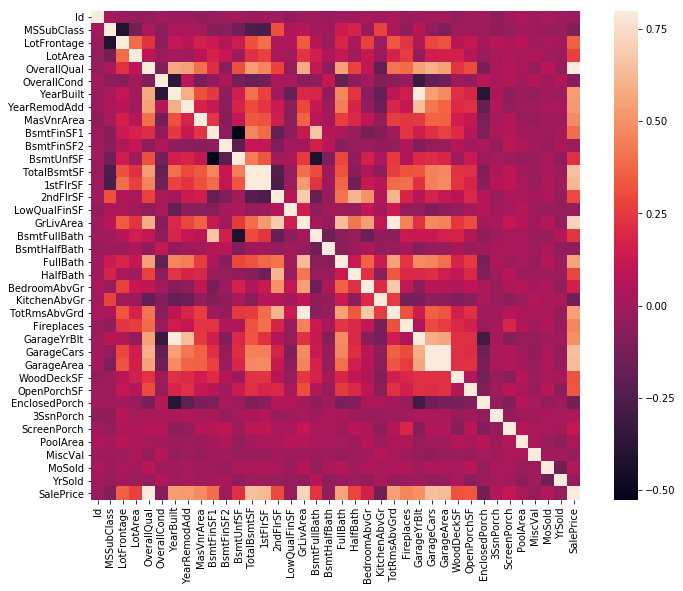

In [16]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,vmax=.8, square=True);

### Normalizing the data 

We take the log of the SalePrice in order to build a normalized model of the data, the reason why we do this is because regressors work better when the data is not distributed sparsely. 

One example of normalization is using a log function: Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.

Text(0,0.5,'Number of occurences')

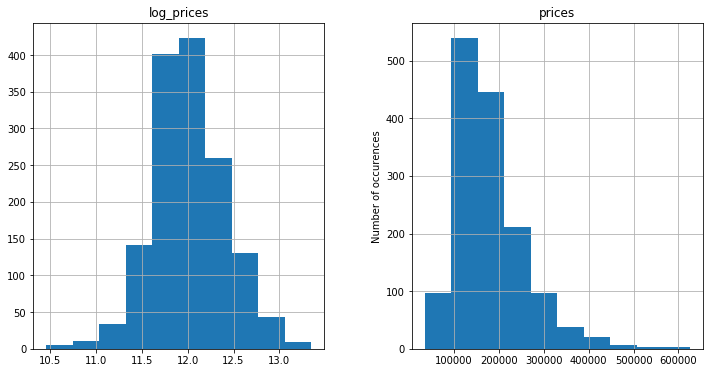

In [17]:
# Increases the size of the histogram to fit both normalized and raw data
plt.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({'log_prices':np.log1p(df_train["SalePrice"]), 'prices': df_train["SalePrice"]})
prices.hist()
plt.ylabel('Number of occurences')

In this we are going to use the skew function to normalize the data here, I learned how to do this from https://www.kaggle.com/apapiu/regularized-linear-models where the skew function essentially prepares the numeric data to be preprocessed, essentially regularized into a value easily processed by the predictor, 

In the following steps we are going to normalize the data. Keep a look out for the mean value of each column in the df_train_num.describe command. That would explain what we are doing to the variables. They are reduced to normalize the data

In [18]:
data = pd.concat((df_train.loc[:,'MSSubClass':'SaleCondition'],
                      df_test.loc[:,'MSSubClass':'SaleCondition']))
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [19]:
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])

#log transform skewed numeric features:
skewed_feats = df_train[numeric].apply(lambda x: skew(x.dropna())) #compute skewness
#print(skewed_feats.loc[skewed_feats.values > 0.75])
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

data[skewed_feats] = np.log1p(data[skewed_feats])

df_train.shape, df_test.shape

((1456, 81), (1459, 80))

This is done in order to convert the categorical columns into a feature based on the values in the dataset
    pd.get_dummies takes a data [a, b, b, c, null] and converts it into [0, 1, 1 , 2, 3] and fills in the null values

In [20]:
print("NAs for features in train : " + str(data.isnull().values.sum()))
data = pd.get_dummies(data)
data = data.fillna(data.mean())
print("Remaining NAs for features in train : " + str(data.isnull().values.sum()))

NAs for features in train : 13952
Remaining NAs for features in train : 0


We now combine the DataFrames from the numerical and categorical columns to form a training set and use it to do the regression analysis. 

In [21]:
#creating matrices for sklearn:
X_train = data[:df_train.shape[0]]
X_test = data[df_train.shape[0]:]
y = df_train.SalePrice

X_train.shape, X_test.shape, y.shape

((1456, 287), (1459, 287), (1456,))

Now the data is ready to be fed to our regression model to get a predictor

## Model, predict and solve the problem.

In this analysis we are going to try implement regression models from sklearn to try to fit this data, we can find more about these basic regression models in the link which has a high level explanation for each notebook http://scikit-learn.org/stable/modules/linear_model.html.

###  Root mean Square error 
The root mean square error of the dataset is the square root of sum of the squared distance between the predictions of the classifier and the actual value in the dataset. 

In simple terms, Root mean square error for a dataset is a way to measure accuracy of the classifier with respect to the dataset. Closer to 1, worse the model. Closer to 0 better the model.

In [22]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring = "neg_mean_squared_error", cv = 10))
    return(rmse)

This is the RMSE for a linear regressor on the training data, it is low because the model is overfitting to the training set.

In [23]:
from sklearn.linear_model import LinearRegression

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv(lr).min())
y_train_pred = lr.predict(X_train)

RMSE on Training set : 0.0951697719601


### Ridge regression

Ridge regression has a parameter alpha that is useful to tune models on the training data to reduce the root mean square error value for the training data in order to predict the model effectively. 

In [24]:
ridge_model = Ridge()

# Alpha is the regularization parameter
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge_train = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]

Text(0,0.5,'rmse')

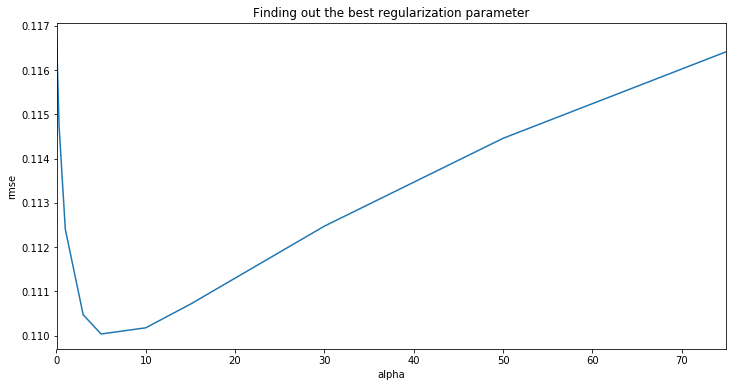

In [25]:
# Plotting the least mean square error on the training data
cv_ridge_train = pd.Series(cv_ridge_train, index = alphas)
cv_ridge_train.plot(title = "Finding out the best regularization parameter")
#cv_ridge_test = pd.Series(cv_ridge_test, index = alphas)
#cv_ridge_test.plot()
plt.xlabel("alpha")
plt.ylabel("rmse")

In [26]:
cv_ridge_train.min()

0.1100409356194354

### Lasso regression

In Lasso regression, some of the columns are picked to be trained on and some columns are discarded based on the alphas, let us find the accuracy of the model first and then find out the number of columns that have been used and discarded by the model.

In [27]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)
rmse_cv(model_lasso).mean()

0.10837230933675752

In [28]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 105 variables and eliminated the other 182 variables


### XGBoost model

Here we use the XGBoost model, based on the gradient descent boosting model to find predictions and see what impact it has on the accuracy. Here we will be finding out the RMSE for this model on both the training and test data and see how it behaves.

In [29]:
import xgboost as xgb

In [30]:
dtrain = xgb.DMatrix(X_train, label = y)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

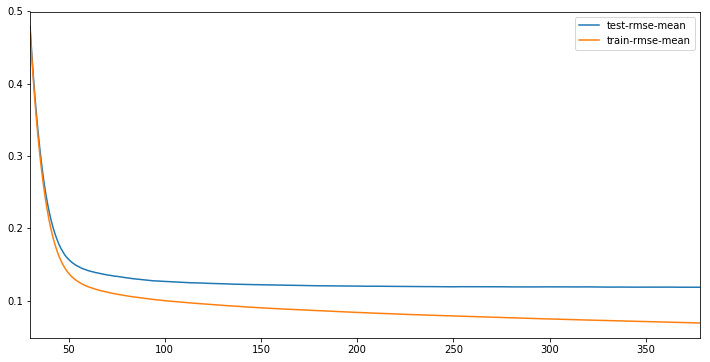

In [31]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

Here we are going to train the XGBoost regressor on the training data

In [32]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(X_train, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=360,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

Here we will be predicting the values for both the XGBoost and Lasso model.

In [33]:
xgb_preds = np.expm1(model_xgb.predict(X_test))
lasso_preds = np.expm1(model_lasso.predict(X_test))

Here we intend to plot the correlation between predictions of different models.

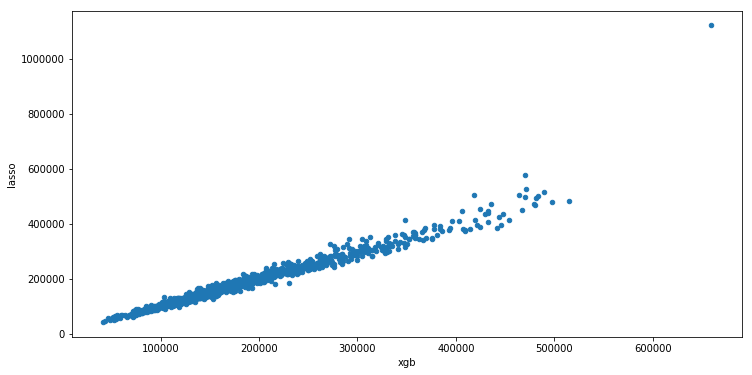

In [34]:
predictions = pd.DataFrame({"xgb":xgb_preds, "lasso":lasso_preds})
predictions.plot(x = "xgb", y = "lasso", kind = "scatter")

This would combine the predictions of two models to use the predictions from both models, though this may hurt accuracy sometimes.

In [35]:
preds = 0.7*lasso_preds + 0.3*xgb_preds

## Supply or submit the results

This supplies the solutions from the predictions in the csv format.

In [36]:
solution = pd.DataFrame({"id":df_test.Id, "SalePrice":preds})
solution.to_csv("ridge_sol.csv", index = False)